In [4]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm


In [6]:
df=sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [13]:
def affairs_check(x):
    if x!=0:
        return 1
    else:
        return 0
    

In [16]:
df['Had_Affair']=df['affairs'].apply(affairs_check)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.961430,1.0,4.0,4.0,5.000000,5.000000
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.000000,42.000000
yrs_married,6366.0,9.009425,7.280120,0.5,2.5,6.0,16.500000,23.000000
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.000000,5.500000
religious,6366.0,2.426170,0.878369,1.0,2.0,2.0,3.000000,4.000000
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.000000,20.000000
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.000000,6.000000
occupation_husb,6366.0,3.850141,1.346435,1.0,3.0,4.0,5.000000,6.000000
affairs,6366.0,0.705374,2.203374,0.0,0.0,0.0,0.484848,57.599991
Had_Affair,6366.0,0.322495,0.467468,0.0,0.0,0.0,1.000000,1.000000


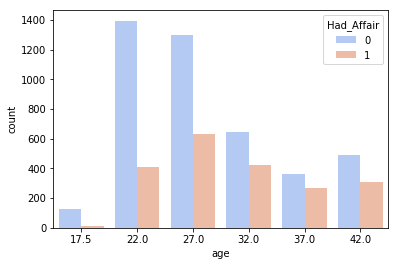

In [25]:
sns.countplot('age',data=df,hue='Had_Affair',palette='coolwarm')

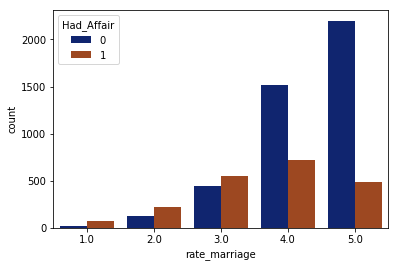

In [28]:
sns.countplot('rate_marriage',data=df,hue='Had_Affair',palette='dark')

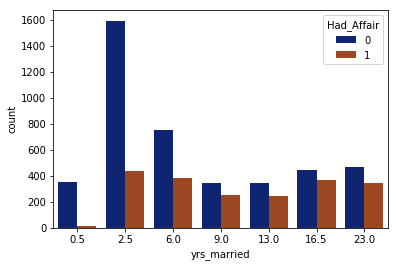

In [29]:
sns.countplot('yrs_married',data=df,hue='Had_Affair',palette='dark')

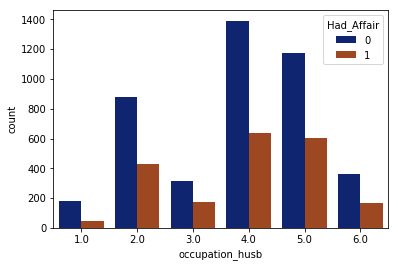

In [31]:
sns.countplot('occupation_husb',data=df,hue='Had_Affair',palette='dark')

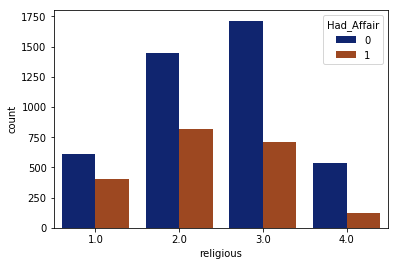

In [32]:
sns.countplot('religious',data=df,hue='Had_Affair',palette='dark')

In [34]:
age_group=df[['age','affairs','Had_Affair']]#dataframe

In [36]:
age_group.head()

,age,affairs,Had_Affair
0,32.0,0.111111,1
1,27.0,3.230769,1
2,22.0,1.400000,1
3,37.0,0.727273,1
4,27.0,4.666666,1


In [40]:
#age_group=pd.concat([df['age'],df['affairs'],df['Had_Affair']],axis=1)
#age_group.head()

In [45]:
age_group_frame=age_group.groupby(['age','Had_Affair']).count()
age_group_frame

affairs
age  Had_Affair         
17.5 0               126
     1                13
22.0 0              1394
     1               406
27.0 0              1298
     1               633
32.0 0               644
     1               425
37.0 0               364
     1               270
42.0 0               487
     1               306

In [49]:
age,affair,affair_not=[],[],[]
for i in range(0,len(age_group_frame['affairs'])):
    age.append(age_group_frame.index[i][0])
    if age_group_frame.index[i][1]==0:
        affair_not.append(age_group_frame['affairs'][i])
    else:
        affair.append(age_group_frame['affairs'][i])
print(age)
print(affair_not)
print(affair)
age=list(set(age))
age.sort()
print(age)

[17.5, 17.5, 22.0, 22.0, 27.0, 27.0, 32.0, 32.0, 37.0, 37.0, 42.0, 42.0]
[126, 1394, 1298, 644, 364, 487]
[13, 406, 633, 425, 270, 306]
[17.5, 22.0, 27.0, 32.0, 37.0, 42.0]


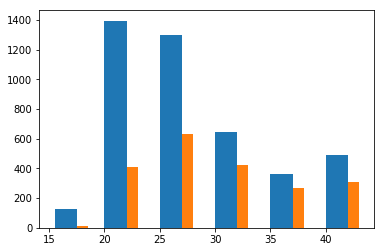

In [56]:
plt.bar(age,affair_not,width=-2.0,align='edge')
plt.bar(age,affair,width=1,align='edge')
plt.show()

In [59]:
age_group_frame.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, (17.5, 0) to (42.0, 1)
Data columns (total 1 columns):
affairs    12 non-null int64
dtypes: int64(1)
memory usage: 485.0 bytes


In [72]:
x=df[['rate_marriage','age','yrs_married','children','religious','educ','occupation','occupation_husb']]
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [73]:
y=np.ravel(df['Had_Affair'])

In [74]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5092, 8) (1274, 8) (5092,) (1274,)


In [77]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
test_predict=log_model.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
pd.concat([DataFrame(np.ravel(y_test),columns=['Test Data']),DataFrame(test_predict,columns=['Test Pred'])],axis=1).head()

,Test Data,Test Pred
0,0,0
1,1,0
2,0,0
3,0,1
4,0,0


In [81]:
print('RMSE',np.sqrt(np.mean((y_test-test_predict)**2)))

RMSE 0.5293578942641549


In [82]:
log_model.score(x_test,y_test)#accuracy rate

0.7197802197802198

In [83]:
log_model.score(x_train,y_train)

0.7238805970149254

In [85]:
metrics.accuracy_score(y_test,test_predict)#accuracy rate same as score

0.7197802197802198